In [3]:
import torch
from botorch.utils.sampling import draw_sobol_samples
from botorch.models import SingleTaskGP
from botorch.fit import fit_gpytorch_mll
from botorch.acquisition import UpperConfidenceBound
from botorch.optim import optimize_acqf
from gpytorch.mlls import ExactMarginalLogLikelihood

def synthetic_objective(x):
    # Assume x is shape (n, 6)
    center = torch.tensor([0.3, 0.7, 0.5, 0.5, 0.2, 0.8])
    scale = 0.05
    return torch.exp(-torch.sum((x - center)**2, dim=-1) / scale)

# 10 initial points in 6D
bounds = torch.tensor([[0.0]*6, [1.0]*6])
X_init = draw_sobol_samples(bounds=bounds, n=10, q=1).squeeze(1)
Y_init = synthetic_objective(X_init).unsqueeze(-1)

gp = SingleTaskGP(X_init, Y_init)
mll = ExactMarginalLogLikelihood(gp.likelihood, gp)
fit_gpytorch_mll(mll)

ucb = UpperConfidenceBound(gp, beta=0.1)  # beta controls exploration
candidate, _ = optimize_acqf(
    acq_function=ucb,
    bounds=bounds,
    q=1,
    num_restarts=10,
    raw_samples=128,
)

# Evaluate new point and update model
new_y = synthetic_objective(candidate).unsqueeze(-1)
X = torch.cat([X_init, candidate], dim=0)
Y = torch.cat([Y_init, new_y], dim=0)

C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_21188\4040070722.py:20: InputDataWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  gp = SingleTaskGP(X_init, Y_init)


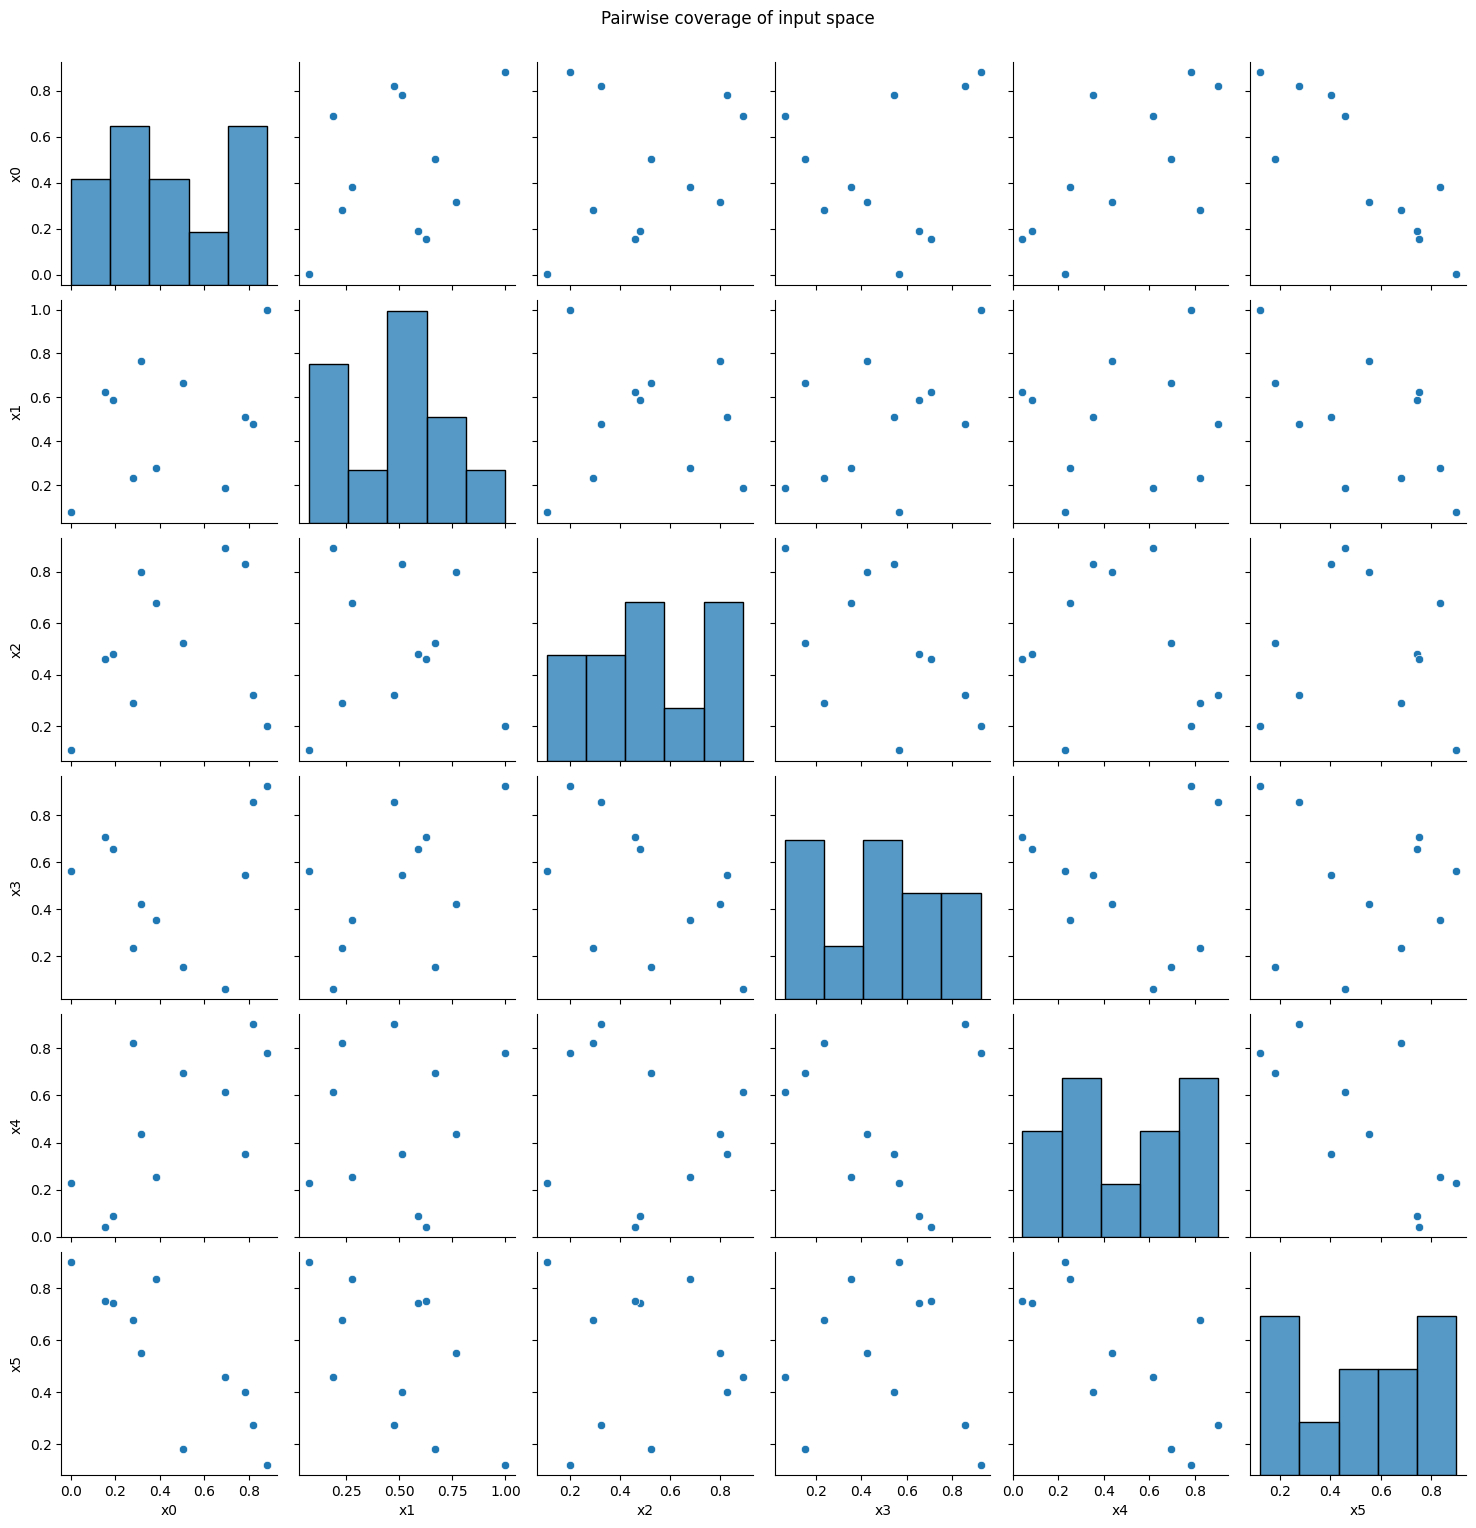

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.DataFrame(X.numpy(), columns=[f"x{i}" for i in range(6)])
sns.pairplot(df)
plt.suptitle("Pairwise coverage of input space", y=1.02)
plt.show()


In [5]:
import umap

# Assume X is your (N x D) tensor of sample points (e.g., 6D)
# Assume Y is the corresponding objective value

def plot_umap(X: torch.Tensor, Y: torch.Tensor):
    # Convert to numpy
    X_np = X.numpy()
    Y_np = Y.squeeze().numpy()

    # UMAP projection to 2D
    reducer = umap.UMAP(n_neighbors=5, min_dist=0.2, random_state=42)
    X_umap = reducer.fit_transform(X_np)

    # Make a scatter plot colored by objective value
    df = pd.DataFrame(X_umap, columns=["UMAP1", "UMAP2"])
    df["Objective"] = Y_np

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(df["UMAP1"], df["UMAP2"], c=df["Objective"], cmap="viridis", s=60)
    plt.colorbar(scatter, label="Objective Value")
    plt.title("UMAP Projection of Samples from BO")
    plt.xlabel("UMAP1")
    plt.ylabel("UMAP2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


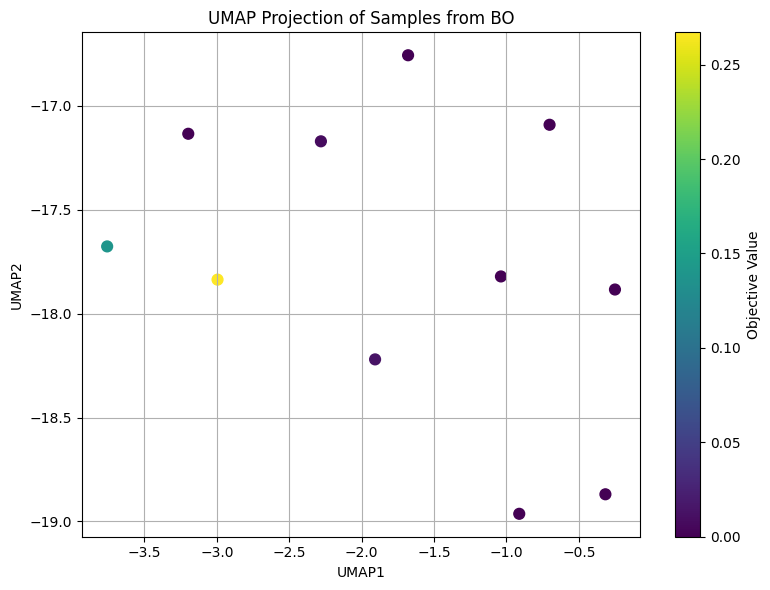

In [6]:
plot_umap(X, Y)

C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_21188\3946597365.py:49: InputDataWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  model = SingleTaskGP(X, Y)
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


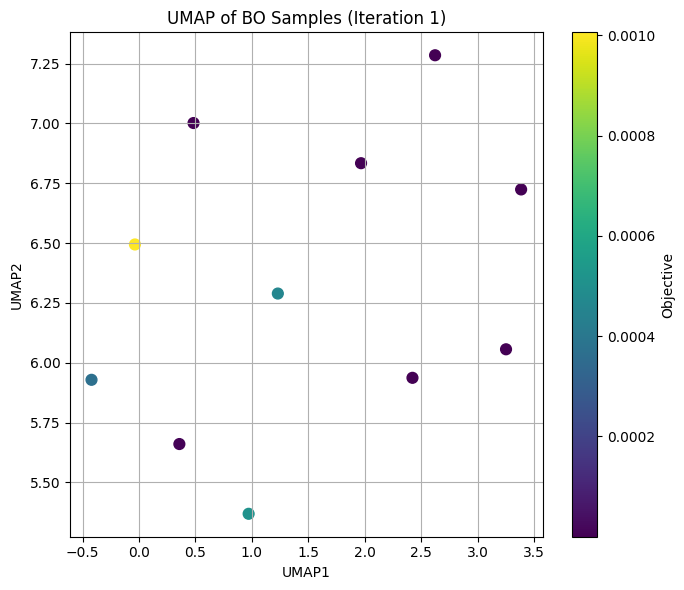

C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_21188\3946597365.py:49: InputDataWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  model = SingleTaskGP(X, Y)
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


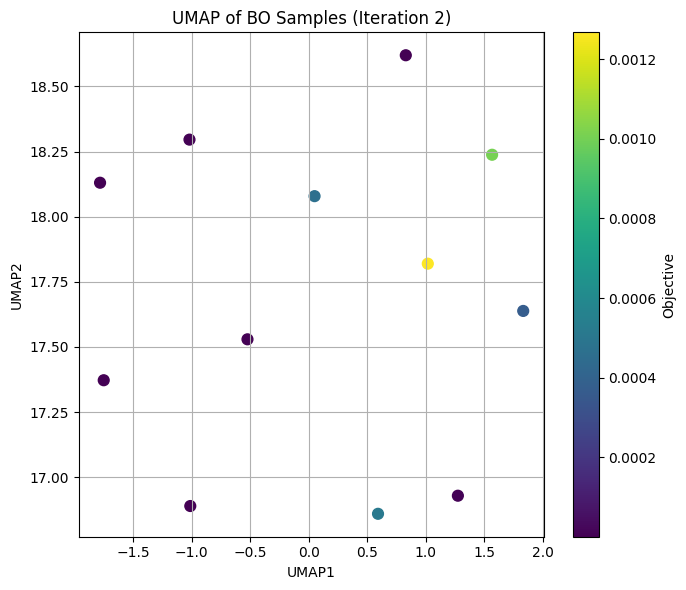

C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_21188\3946597365.py:49: InputDataWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  model = SingleTaskGP(X, Y)
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


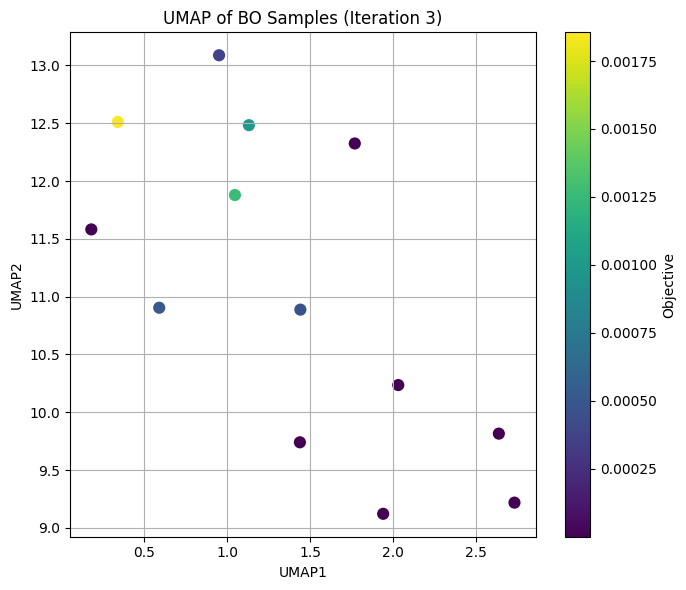

C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_21188\3946597365.py:49: InputDataWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  model = SingleTaskGP(X, Y)
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


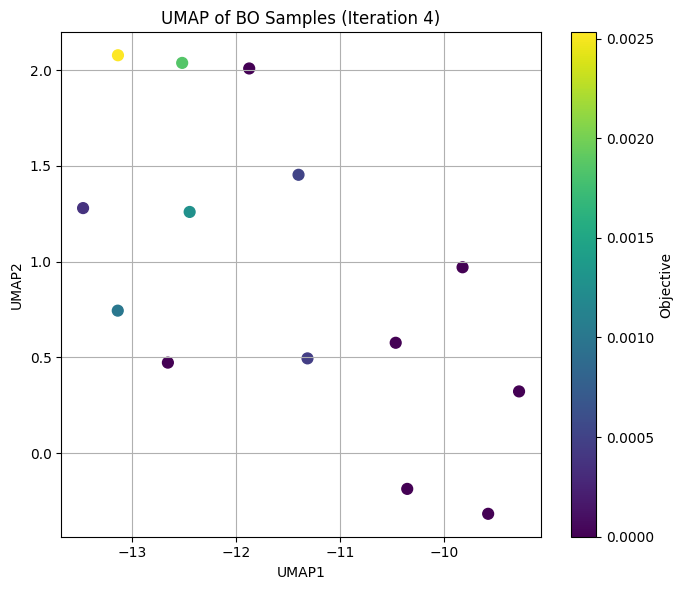

C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_21188\3946597365.py:49: InputDataWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  model = SingleTaskGP(X, Y)
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


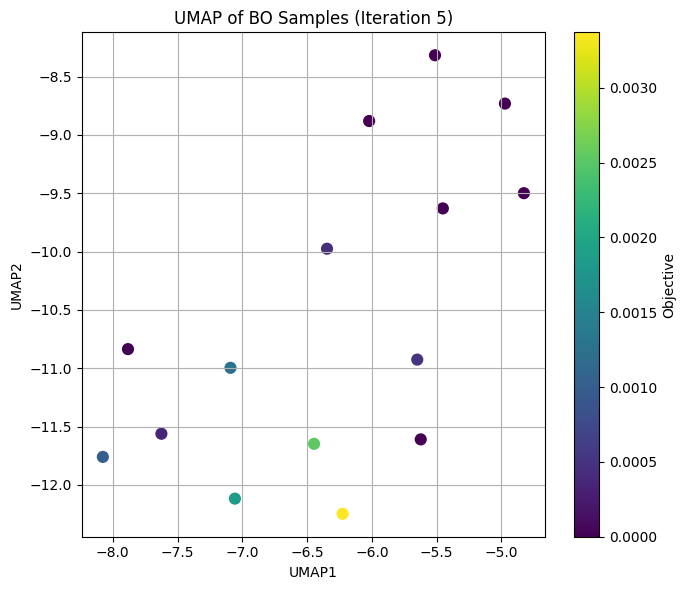

C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_21188\3946597365.py:49: InputDataWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  model = SingleTaskGP(X, Y)
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


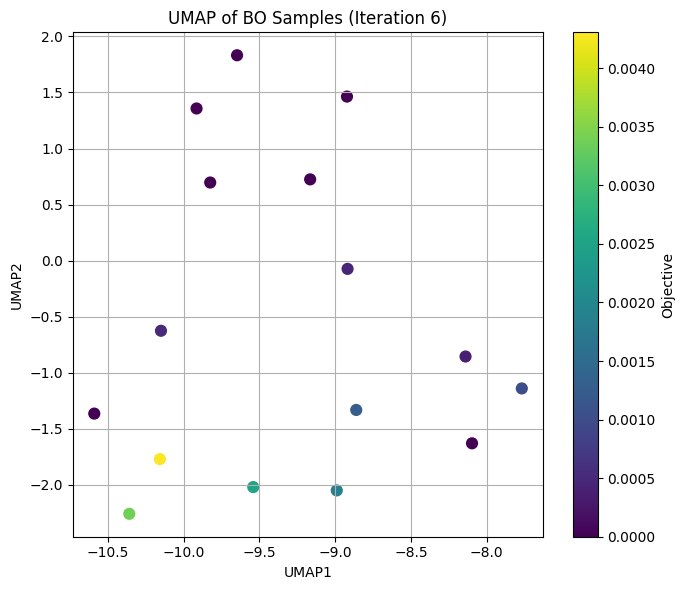

C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_21188\3946597365.py:49: InputDataWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  model = SingleTaskGP(X, Y)
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


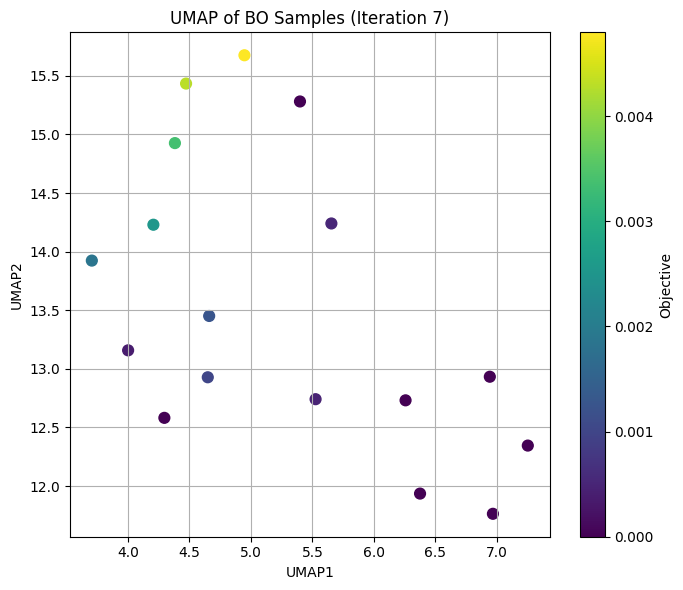

C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_21188\3946597365.py:49: InputDataWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  model = SingleTaskGP(X, Y)
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


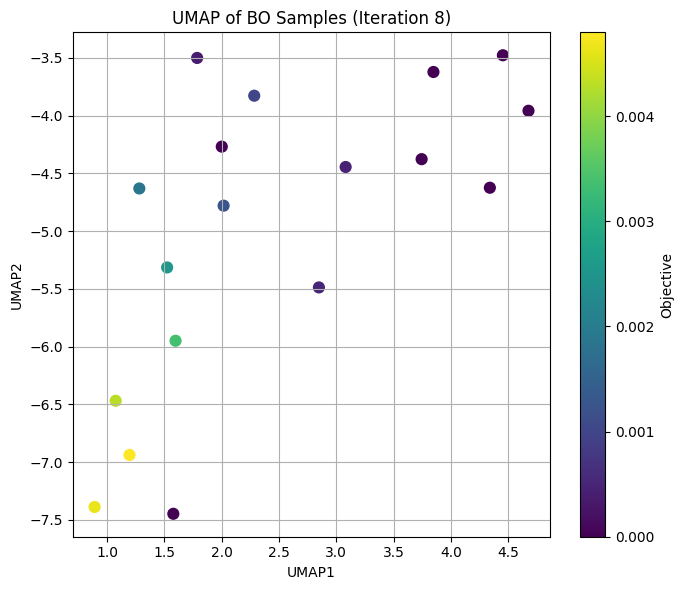

C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_21188\3946597365.py:49: InputDataWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  model = SingleTaskGP(X, Y)
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


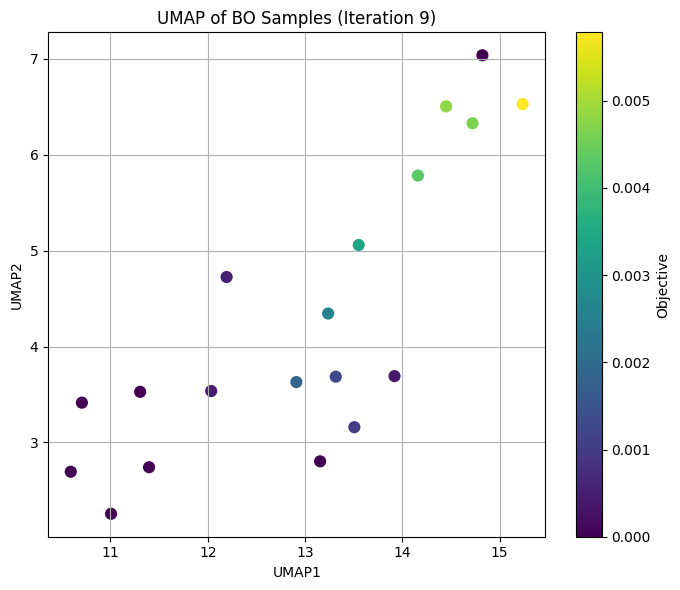

C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_21188\3946597365.py:49: InputDataWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  model = SingleTaskGP(X, Y)
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


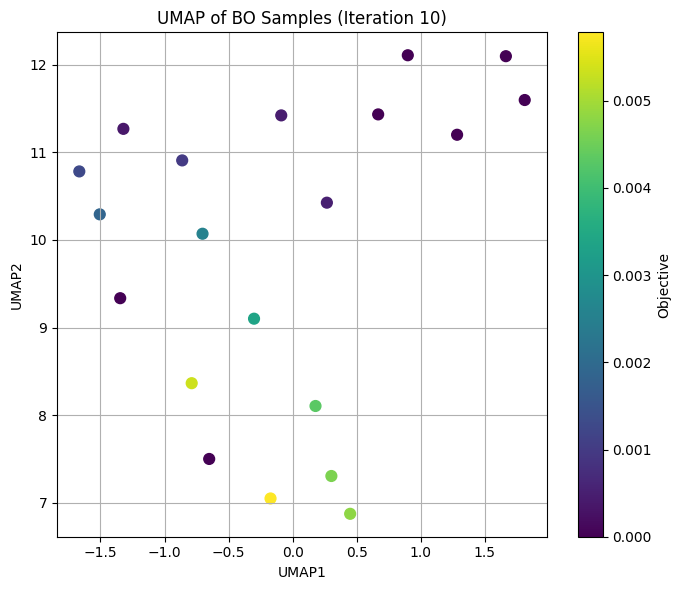

C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_21188\3946597365.py:49: InputDataWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  model = SingleTaskGP(X, Y)
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


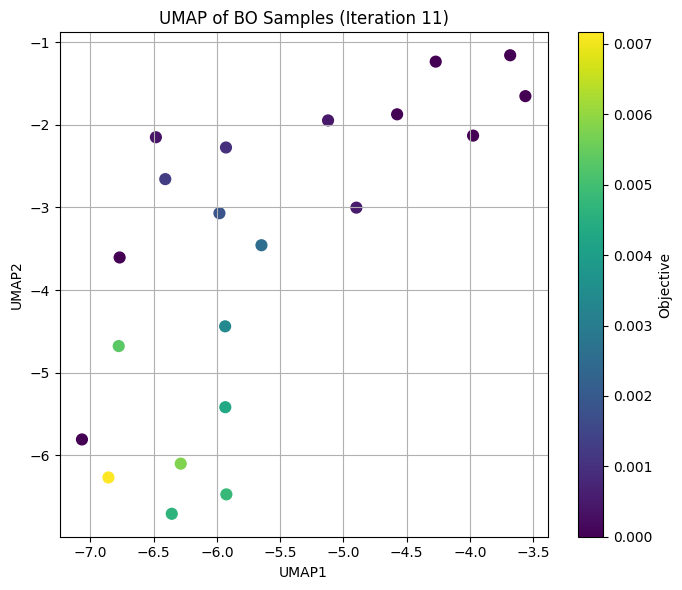

C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_21188\3946597365.py:49: InputDataWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  model = SingleTaskGP(X, Y)
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


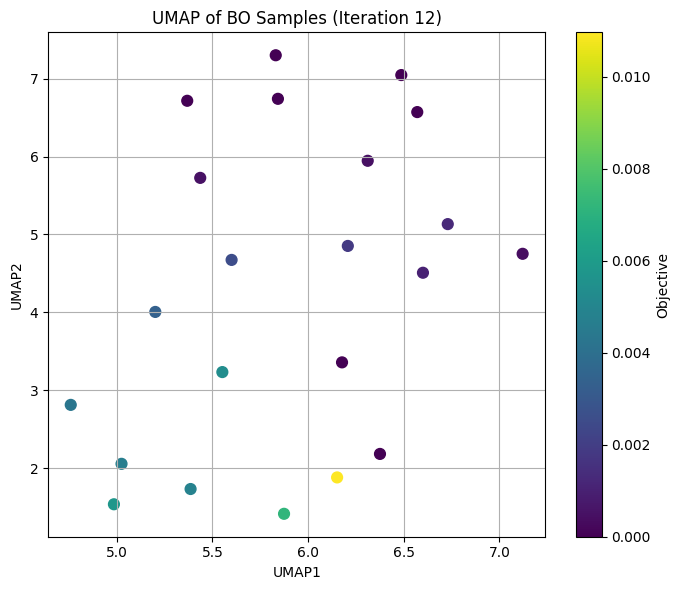

C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_21188\3946597365.py:49: InputDataWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  model = SingleTaskGP(X, Y)
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


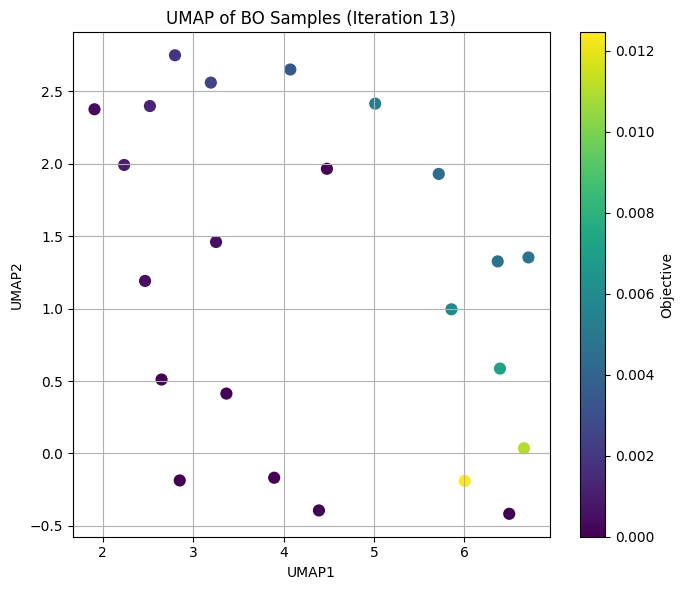

C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_21188\3946597365.py:49: InputDataWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  model = SingleTaskGP(X, Y)
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


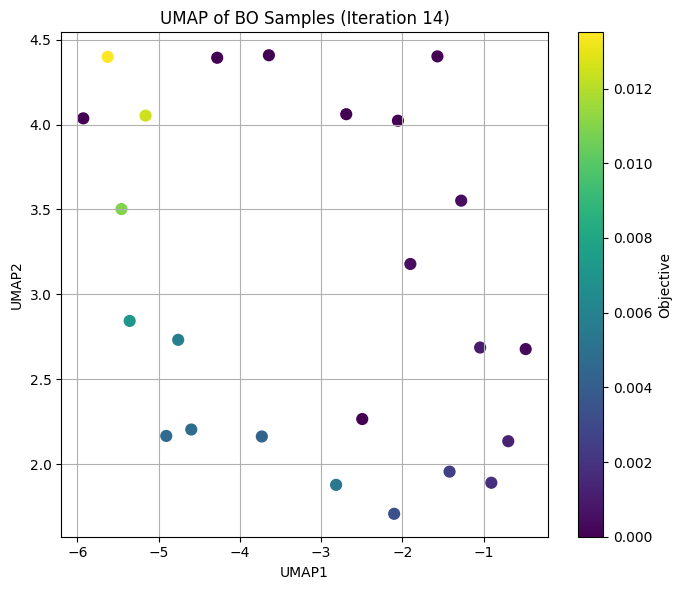

C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_21188\3946597365.py:49: InputDataWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  model = SingleTaskGP(X, Y)
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


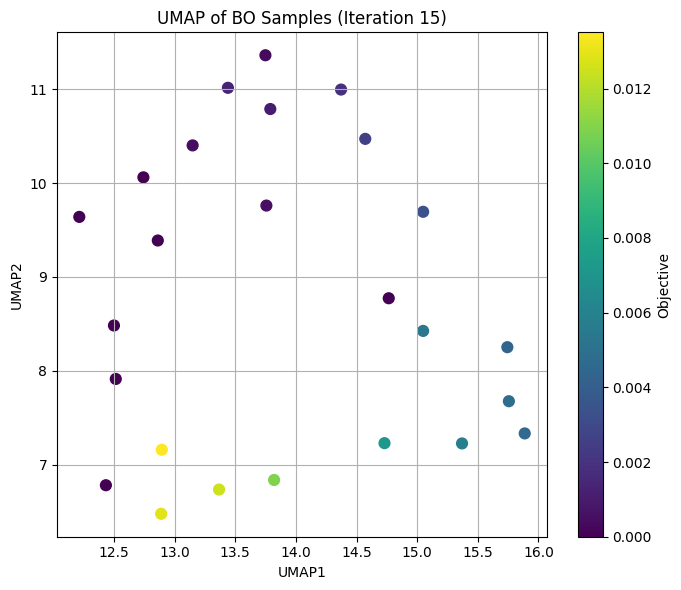

C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_21188\3946597365.py:49: InputDataWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  model = SingleTaskGP(X, Y)
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


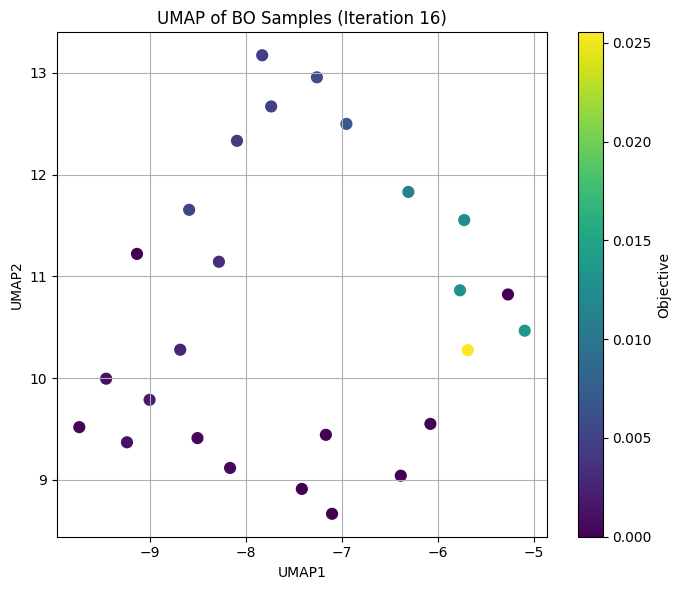

C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_21188\3946597365.py:49: InputDataWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  model = SingleTaskGP(X, Y)
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


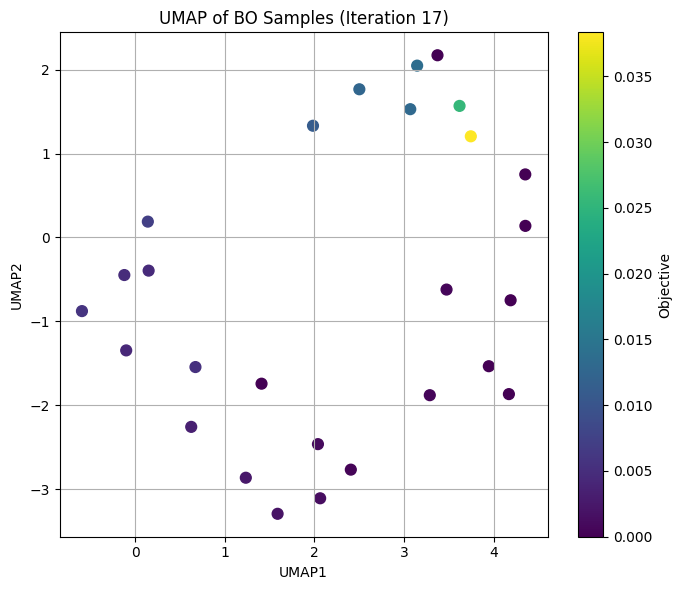

C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_21188\3946597365.py:49: InputDataWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  model = SingleTaskGP(X, Y)
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\botorch\optim\optimize.py:652: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 2 and message ABNORMAL: .')]
Trying again with a new set of initial conditions.
  return _optimize_acqf_batch(opt_inputs=opt_inputs)
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\

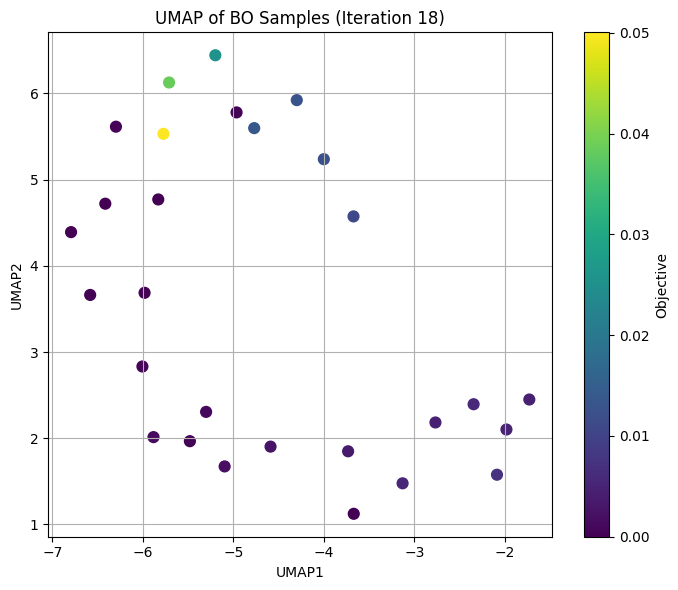

C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_21188\3946597365.py:49: InputDataWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  model = SingleTaskGP(X, Y)
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


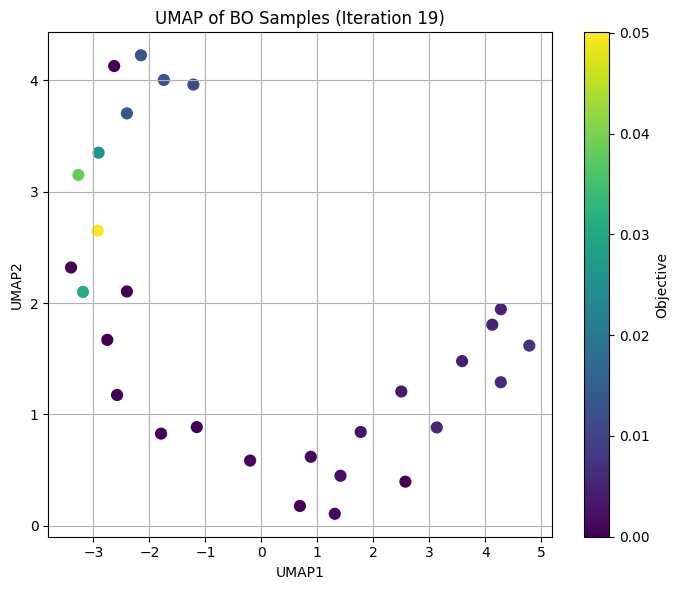

C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_21188\3946597365.py:49: InputDataWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  model = SingleTaskGP(X, Y)
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\uqkmuroi\gitcode\Torch-Practice\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


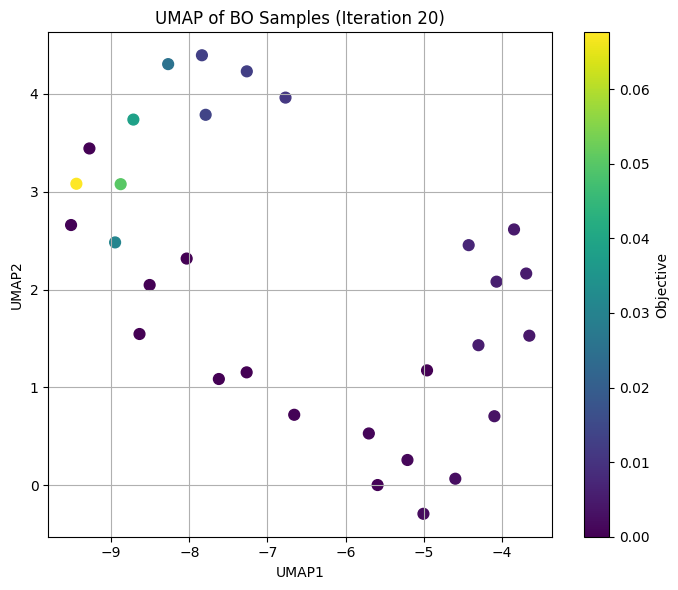

In [ ]:
# this model visualizes iterations in umap space
# what this should do is show clusters of high performing points together in the multidimensional space and represent them in 2d

import torch
import matplotlib.pyplot as plt
import pandas as pd
import umap
import seaborn as sns

from botorch.utils.sampling import draw_sobol_samples
from botorch.models import SingleTaskGP
from botorch.fit import fit_gpytorch_mll
from botorch.acquisition import UpperConfidenceBound
from botorch.optim import optimize_acqf
from gpytorch.mlls import ExactMarginalLogLikelihood

# ----- Synthetic objective -----
def synthetic_objective(x):
    center = torch.tensor([0.3, 0.7, 0.5, 0.5, 0.2, 0.8])
    scale = 0.05
    return torch.exp(-torch.sum((x - center) ** 2, dim=-1) / scale)

# ----- UMAP Plot -----
def plot_umap(X: torch.Tensor, Y: torch.Tensor, iteration: int):
    X_np = X.numpy()
    Y_np = Y.squeeze().numpy()
    reducer = umap.UMAP(n_neighbors=5, min_dist=0.2, random_state=42)
    X_umap = reducer.fit_transform(X_np)

    df = pd.DataFrame(X_umap, columns=["UMAP1", "UMAP2"])
    df["Objective"] = Y_np

    plt.figure(figsize=(7, 6))
    scatter = plt.scatter(df["UMAP1"], df["UMAP2"], c=df["Objective"], cmap="viridis", s=60)
    plt.colorbar(scatter, label="Objective")
    plt.title(f"UMAP of BO Samples (Iteration {iteration})")
    plt.xlabel("UMAP1")
    plt.ylabel("UMAP2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ----- Initial design -----
bounds = torch.tensor([[0.0]*6, [1.0]*6])
X = draw_sobol_samples(bounds=bounds, n=10, q=1).squeeze(1)
Y = synthetic_objective(X).unsqueeze(-1)

# ----- BO Loop -----
N_ITER = 20
for iteration in range(1, N_ITER + 1):
    # Fit GP
    model = SingleTaskGP(X, Y)
    mll = ExactMarginalLogLikelihood(model.likelihood, model)
    fit_gpytorch_mll(mll)

    # Acquisition
    ucb = UpperConfidenceBound(model, beta=0.1)
    candidate, _ = optimize_acqf(
        acq_function=ucb,
        bounds=bounds,
        q=1,
        num_restarts=10,
        raw_samples=128,
    )

    # Evaluate and append
    Y_new = synthetic_objective(candidate).unsqueeze(-1)
    X = torch.cat([X, candidate], dim=0)
    Y = torch.cat([Y, Y_new], dim=0)

    # UMAP Plot
    plot_umap(X, Y, iteration)
